# Beberapa Penerapan dari Algoritma-Algoritma Kecerdasan Buatan

## Algoritma Genetika

1. Menggunakan bahasa pemrograman python
2. Menggunakan library **PyGAD**

**PyGAD**: Python library untuk algoritma genetika [https://pygad.readthedocs.io/en/latest/](https://pygad.readthedocs.io/en/latest/)

<p align="center">
  <img src="img/img1.png" />
</p>

- Cara install library **PyGAD**:

`pip install pygad`

## Contoh 1 Penerapan Algoritma Genetika

1. Contoh penggunaan PyGAD dalam optimalisasi.
2. Mengoptimalkan persamaan

$$ f(x_1, x_2) = 3x_1^2 - 2x_1x_2 + 3x_2^2 - x_1 - x_2 $$

3. Berapa nilai $x_1$ dan $x_2$ sehingga $y$ atau $f(x_1, x_2)$ paling minimum

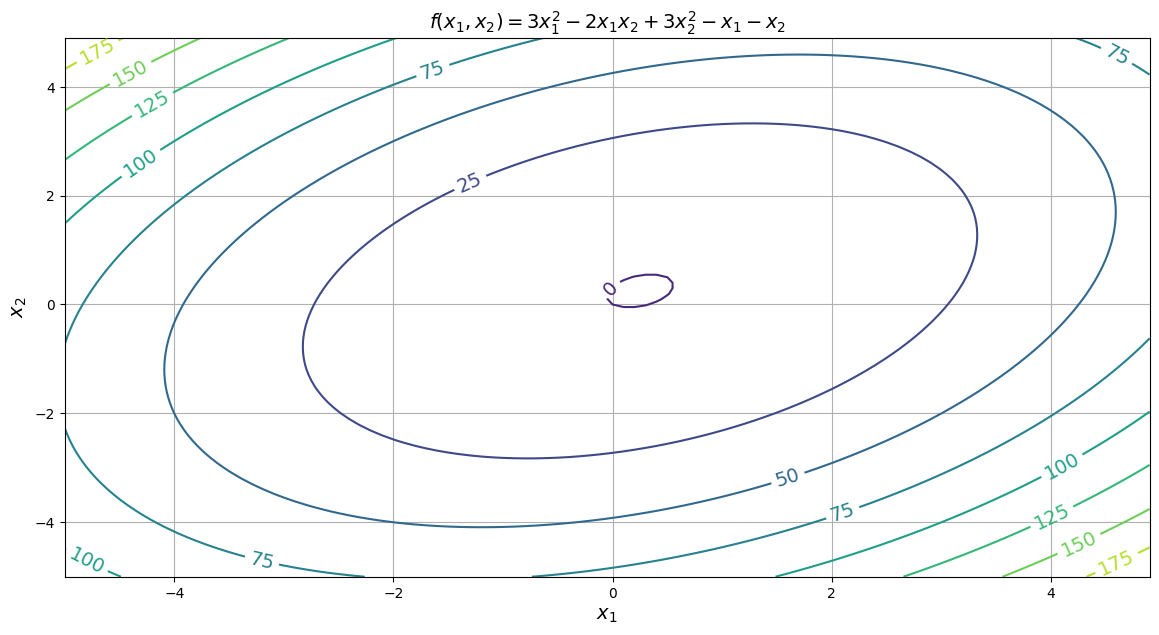

In [76]:
import numpy as np
import matplotlib.pyplot as plt

def pers1(X,Y):
    return 3*X**2 - 2*X*Y + 3*Y**2 - X - Y

x = np.vstack((np.array([np.arange(-5,5,0.1)]),
               np.array([np.arange(-5,5,0.1)])))

X,Y = np.meshgrid(x[0], x[1])
Z = pers1(X,Y)
fig, ax = plt.subplots(figsize=(14, 7))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=14)
ax.set_title('$ f(x_1, x_2) = 3x_1^2 - 2x_1x_2 + 3x_2^2 - x_1 - x_2 $', fontsize=14)
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.grid()

Bagaimana cara menggunakan **PyGAD**?
1. Persiapkan parameter `fitness_func`
2. Persiapakan parameter lainnya
3. Import `pygad`
4. Membuat *instance* dari `pygad.GA` *class*
5. Jalankan algoritma genetika
6. Plot hasilnya
7. Tampilkan solusi terbaik

## 1. Persiapkan parameter `fitness_func`

- Persiapkan parameter `fitness_func`
- Gunakan persamaan $$ f(x_1, x_2) = 3x_1^2 - 2x_1x_2 + 3x_2^2 - x_1 - x_2 $$
- Berapa nilai $x_1$ dan $x_2$ sehingga $y$ atau $f(x_1, x_2)$ paling minimum

In [77]:
def pers1(X,Y):
    return 3*X**2 - 2*X*Y + 3*Y**2 - X - Y

def calculate_fitness(ga_instance, solution, solution_idx):
    output = pers1(solution[0],solution[1])
    fitness = -output

    return fitness

## 2. Persiapakan parameter lainnya

In [78]:
num_generations = 20
num_parents_mating = 3
sol_per_pop = 10
num_genes = 2
parent_selection_type="sss"
keep_parents=1
crossover_type="uniform"
mutation_type="random"
mutation_probability = .5

def on_generation(ga):
    print("Generation", ga.generations_completed)
    print(ga.population)

## 3. Import `pygad`

In [79]:
import pygad

# 4. Membuat *instance* dari `pygad.GA` *class*

In [80]:
ga_instance1 = pygad.GA(num_generations = num_generations,
                       num_parents_mating = num_parents_mating,
                       fitness_func = calculate_fitness,
                       sol_per_pop = sol_per_pop,
                       num_genes = num_genes,
                       parent_selection_type = parent_selection_type,
                       keep_parents = keep_parents,
                       crossover_type = crossover_type,
                       mutation_type = mutation_type,
                       mutation_probability = mutation_probability,
                       on_generation = on_generation
                       )

/home/fafa/miniconda3/envs/py311/lib/python3.11/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


## 5. Jalankan algoritma genetika

In [81]:
ga_instance1.run()

Generation 1
[[-0.99868512 -2.57572516]
 [-1.16873851 -1.32481714]
 [-3.34445335 -3.11395251]
 [ 0.45313287 -2.57572516]
 [-3.26462222 -1.3329739 ]
 [-3.7458583  -3.11395251]
 [-1.79301427 -1.78691518]
 [-0.99868512 -1.44157272]
 [-2.04091877 -1.09856359]
 [ 0.50802594 -2.57572516]]
Generation 2
[[-1.16873851 -1.32481714]
 [-1.16873851 -1.32481714]
 [-1.28011296 -1.44157272]
 [-2.04091877 -1.80223747]
 [-1.49723493 -1.79652108]
 [-0.19697157 -1.81834456]
 [-1.16873851 -1.32481714]
 [-0.99868512 -1.44157272]
 [-2.04091877 -1.09856359]
 [-1.16873851 -1.32481714]]
Generation 3
[[-1.16873851 -1.32481714]
 [-1.11781424 -0.80752944]
 [-1.39425634 -0.61595753]
 [-1.16873851 -1.32481714]
 [-1.16873851 -2.29385739]
 [-1.16873851 -2.25229667]
 [-1.16873851 -0.98825068]
 [-1.16873851 -1.32481714]
 [-1.16873851 -1.32481714]
 [-1.24465504 -1.32481714]]
Generation 4
[[-1.11781424 -0.80752944]
 [-1.11781424 -0.80752944]
 [-2.13195205 -0.61595753]
 [-0.56495807 -0.61595753]
 [-1.11781424 -0.86651421]


## 6. Plot hasilnya

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


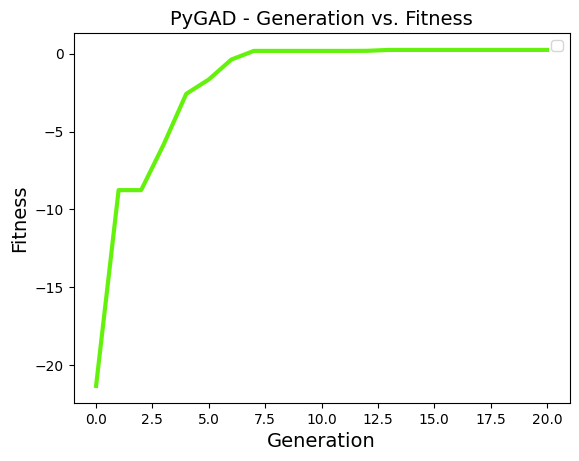

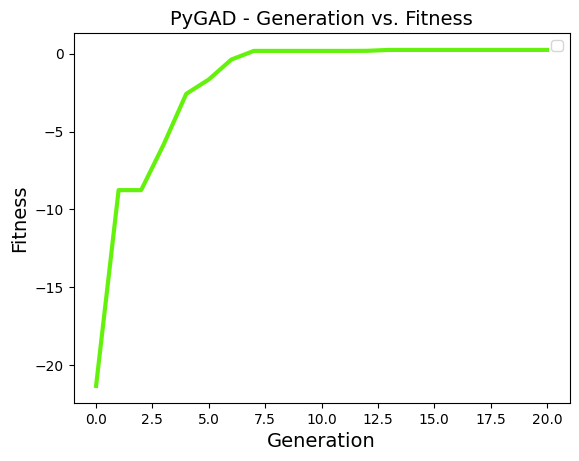

In [82]:
ga_instance1.plot_fitness()

## 7. Tampilkan solusi terbaik

In [83]:
solution, solution_fitness, solution_idx = ga_instance1.best_solution()
print(f"Parameters dari solusi terbaik : {solution}")
print(f"Nilai fitness dari solusi terbaik = {-solution_fitness}")

Parameters dari solusi terbaik : [0.21943983 0.29847723]
Nilai fitness dari solusi terbaik = -0.2371851578081987


## Contoh 2 Penerapan Algoritma Genetika

1. Mencari rute terbaik
2. Mengunjungi semua kedai kopi janji jiwa
3. Mulai dari ITK, kembali ke ITK

<p align="center">
  <img src="img/img2.png" />
</p>

## 1. Persiapkan parameter `fitness_func`

- Membuat tabel berisikan semua jarak antar titik
- Jarak dari ITK ke Janji Jiwa Grand City
<p align="center">
    <img src="img/img3.png" />
</p>

- Jarak dari ITK ke Janji Jiwa Bumi Nirwana

<p align="center">
    <img src="img/img4.png" />
</p>

- Jarak dari Janji Jiwa Grand City ke Janji Jiwa Bumi Nirwana

<p align="center">
    <img src="img/img5.png" />
</p>

- Sehingga didapatkan keseluruhan jarak antara semua titik
- Simpan dalam format file **csv**
<p align="center">
    <img src="img/img6.png" />
</p>

- Bagaimana `fitness_func`-nya?
- Optimalkan rute terpendek
- Contoh:
    - ITK--12.1 KM--Indrakila--3.3 KM--Grand City--2.6 KM--MT. Haryono--1.8 KM--Ruhui Rahayu--7.9 KM--Ahmad Yani--20.5 KM--ITK
    - TOTAL = 48.2 KM

In [84]:
import pandas as pd

data = pd.read_csv('data_janji_jiwa.csv')
data

,JARAK (KM),ITK,INDRAKILA,GRAND CITY,MT. HARYONO,RUHUI RAHAYU,AHMAD YANI
0,ITK,0.0,12.1,12.4,14.7,16.4,20.5
1,INDRAKILA,12.1,0.0,3.3,3.7,5.4,6.2
2,GRAND CITY,12.4,3.3,0.0,2.6,4.3,9.0
3,MT. HARYONO,14.7,3.7,2.6,0.0,1.7,6.8
4,RUHUI RAHAYU,16.4,5.4,4.3,1.8,0.0,7.9
5,AHMAD YANI,20.5,6.2,9.0,6.8,7.9,0.0


In [85]:
len(data)

6

In [86]:
data.iloc[0]

JARAK (KM)       ITK
ITK              0.0
INDRAKILA       12.1
GRAND CITY      12.4
MT. HARYONO     14.7
RUHUI RAHAYU    16.4
AHMAD YANI      20.5
Name: 0, dtype: object

In [87]:
data.iloc[0,1]

0.0

In [88]:
data.iloc[0,1+1]

12.1

In [89]:
data.iloc[1]

JARAK (KM)      INDRAKILA
ITK                  12.1
INDRAKILA             0.0
GRAND CITY            3.3
MT. HARYONO           3.7
RUHUI RAHAYU          5.4
AHMAD YANI            6.2
Name: 1, dtype: object

In [90]:
data.iloc[1,2]

0.0

In [91]:
data.iloc[1,2+1]

3.3

In [92]:
def cal_fitness(ga_instance, solution, solution_idx):
    solution = np.sum([data.iloc[0, solution[0]+1],
                       data.iloc[solution[0], solution[1]+1],
                       data.iloc[solution[1], solution[2]+1],
                       data.iloc[solution[2], solution[3]+1],
                       data.iloc[solution[3], solution[4]+1],
                       data.iloc[solution[4], 1]])
    return -solution

## 2. Persiapakan parameter lainnya

In [93]:
num_generations = 20
num_parents_mating = 2
sol_per_pop = 10
num_genes = 5
gene_type = int
gene_space = np.arange(1,len(data))
allow_duplicate_genes=False
mutation_type='random'
mutation_percent_genes=50

def on_generation(ga):
    print("Generation", ga.generations_completed)
    print(ga.population)

## 3. Import `pygad`

In [94]:
import pygad

## 4. Membuat *instance* dari `pygad.GA` *class*

In [95]:
ga_instance2 = pygad.GA(num_generations = num_generations,
                       num_parents_mating = num_parents_mating,
                       fitness_func = cal_fitness,
                       sol_per_pop = sol_per_pop,
                       num_genes = num_genes,
                       gene_type = gene_type,
                       gene_space = np.arange(1,len(data)),
                       allow_duplicate_genes = allow_duplicate_genes,
                       on_generation = on_generation,
                       mutation_type = mutation_type,
                       mutation_percent_genes = mutation_percent_genes
                       )

/home/fafa/miniconda3/envs/py311/lib/python3.11/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


## 5. Jalankan algoritma genetika

In [96]:
ga_instance2.run()

Generation 1
[[1 5 4 3 2]
 [1 5 4 3 2]
 [1 4 5 3 2]
 [3 1 4 5 2]
 [4 5 1 3 2]
 [1 2 4 5 3]
 [1 2 4 3 5]
 [4 5 1 2 3]
 [1 3 4 5 2]
 [1 5 4 3 2]]
Generation 2
[[1 5 4 3 2]
 [2 5 4 3 1]
 [1 5 4 3 2]
 [1 5 4 3 2]
 [1 5 4 3 2]
 [4 2 1 3 5]
 [4 5 2 3 1]
 [1 4 5 3 2]
 [1 5 4 2 3]
 [1 5 4 3 2]]
Generation 3
[[1 5 4 3 2]
 [1 5 4 2 3]
 [1 5 4 3 2]
 [5 1 4 3 2]
 [3 2 4 1 5]
 [1 3 4 5 2]
 [4 5 1 2 3]
 [1 2 4 3 5]
 [1 4 5 2 3]
 [1 5 3 4 2]]
Generation 4
[[1 5 4 3 2]
 [2 5 4 3 1]
 [1 5 4 3 2]
 [4 5 1 2 3]
 [1 5 4 3 2]
 [3 5 2 1 4]
 [1 5 2 3 4]
 [2 3 4 5 1]
 [2 5 3 4 1]
 [1 5 4 3 2]]
Generation 5
[[2 3 4 5 1]
 [2 4 3 1 5]
 [1 5 2 3 4]
 [1 3 4 5 2]
 [1 3 4 5 2]
 [2 1 4 3 5]
 [1 5 2 4 3]
 [2 5 1 3 4]
 [1 4 5 3 2]
 [2 3 4 1 5]]
Generation 6
[[2 3 4 5 1]
 [1 3 4 5 2]
 [1 3 4 5 2]
 [2 4 3 5 1]
 [4 3 1 5 2]
 [1 2 4 5 3]
 [1 2 4 5 3]
 [5 3 4 2 1]
 [5 3 4 1 2]
 [4 3 2 5 1]]
Generation 7
[[2 3 4 5 1]
 [2 1 3 5 4]
 [2 4 3 5 1]
 [3 2 4 1 5]
 [5 3 4 2 1]
 [2 3 5 1 4]
 [1 4 3 5 2]
 [5 4 1 2 3]
 [2 3 4 5 1]
 [4 1 

## 6. Plot hasilnya

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


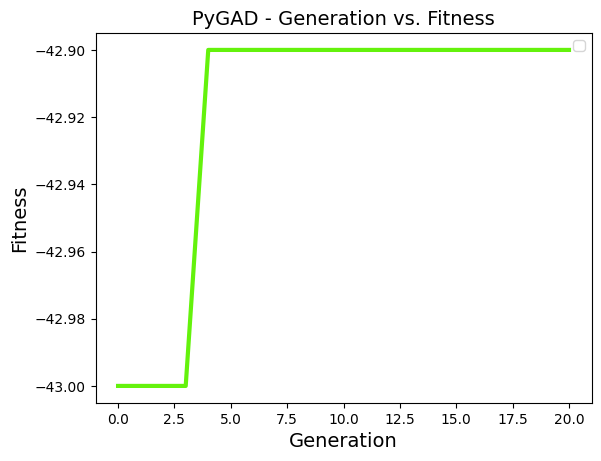

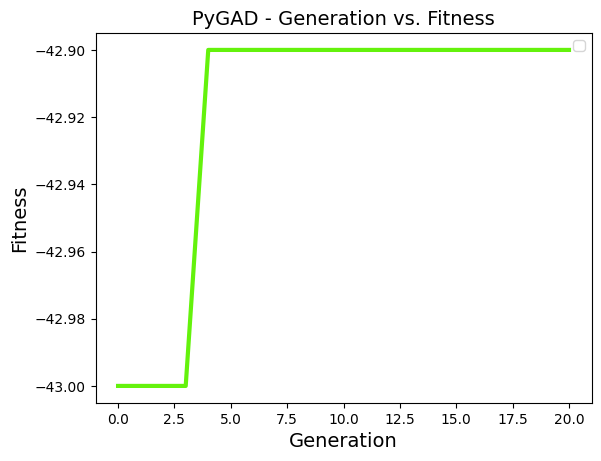

In [97]:
ga_instance2.plot_fitness()

## 7. Tampilkan solusi terbaik

In [98]:
solution, solution_fitness, solution_idx = ga_instance2.best_solution()
print(f"Parameters dari solusi terbaik : {solution}")
print(f"Nilai fitness dari solusi terbaik = {-solution_fitness}")

Parameters dari solusi terbaik : [2 3 4 5 1]
Nilai fitness dari solusi terbaik = 42.9


In [100]:
rute_terbaik = "ITK"
for i in range(len(solution)):
    rute_terbaik += ' -> ' + data.iloc[solution[i],0]

rute_terbaik += " -> ITK"

print(f"Rute ngopi terbaik adalah = '{rute_terbaik}' dengan total jarak tempuh {-solution_fitness} km")

Rute ngopi terbaik adalah = 'ITK -> GRAND CITY -> MT. HARYONO -> RUHUI RAHAYU -> AHMAD YANI -> INDRAKILA -> ITK' dengan total jarak tempuh 42.9 km
